# Question 1

[Chatlog](https://chatgpt.com/share/66fb131b-9ea4-8001-b97c-8bd22a791ae90)

My own words: Standard error of the mean refers to the standard deviation of the sampling distribution of the sample mean. It measures the variability of the samle mean estimates if we were to take multipple samples from the same population.Whereas the standard deviation is the spread of individual data points in the original dataset around the mean. It measures how indivdual observations deviate fro the average value. 


My discussion with chatGPT:

Here's a summary of our recent interaction:

- You asked about the difference between the **standard error of the mean (SEM)** and the **standard deviation (SD)** of the original data. 
- **Standard deviation** measures the variability among individual data points in a dataset, while the **standard error of the mean** measures how much the sample mean is expected to fluctuate if we took many samples.
- SEM provides an idea of the **precision** of the sample mean as an estimate of the population mean, while SD captures the **spread** of the data points themselves.
- I explained how to calculate both the SD and SEM in Python. For the **SD**, you can directly use `np.std()` on the original data. For the **SEM**, you can either use the formula \(\frac{SD}{\sqrt{n}}\), or calculate it by bootstrapping sample means and using the standard deviation of those means.


# Question 2 

[Chatlog](https://chatgpt.com/share/66fb131b-9ea4-8001-b97c-8bd22a791ae9)

1. First, you calculate the bootstrapped means by resampling your original dataset by a certain number of times (e.g. 1000times) to create a distribution of sample means. 

2. After obtaining the the distribution of bootstrapped means, the standard error of the boostrapped sample means is calculated. This is done by dividing the standard deviation of the bootstrapped means by the square root of the number of bootstrapped samples. 

3. Determine the confidence interval. 

4. Interpet the confidence interval. This step proides you with a range that you can be confident that 95% of the time the true population mean will lie within this range.

# Question 3

1. First, sort the bootsrapped means in acending order.
2. Calculate the lower bound using the function np.quantile(bootstrapped_means, 0.025) and the upper bound using the function np.quantile(bootstrapped_means, 0.975)

3. Costruct the confidence interval using the numerical values found in the lower and upper bound using the method above. 


In [15]:
# Question 4
#[chatlog](https://chatgpt.com/share/66fb1b06-1a04-8001-9001-1a29d19ec29f)

#First, I generated a dataset using chatGPT. 

import numpy as np
# Generate a dataset of 50 random numbers from 0 to 100
data = np.random.randint(0, 101, size=50)

# Set up bootstrap function for mean
def bootstrap_mean_confidence_interval(data, num_bootstrap_samples=1000, ci_level=0.95):
   
    bootstrapped_means = []

    # Perform bootstrap resampling
    for _ in range(num_bootstrap_samples):
        resample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_means.append(np.mean(resample))

    # Calculate the percentiles for the confidence interval
    lower_bound = np.percentile(bootstrapped_means, (1 - ci_level) / 2 * 100)
    upper_bound = np.percentile(bootstrapped_means, (1 + ci_level) / 2 * 100)

    return lower_bound, upper_bound

# Apply the bootstrap function to the dataset for mean
ci_mean = bootstrap_mean_confidence_interval(data)

# Demonstrate how to change the code for the median
def bootstrap_median_confidence_interval(data, num_bootstrap_samples=1000, ci_level=0.95):
    
    bootstrapped_medians = []

    # Perform bootstrap resampling
    for _ in range(num_bootstrap_samples):
        resample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_medians.append(np.median(resample))

    # Calculate the percentiles for the confidence interval
    lower_bound = np.percentile(bootstrapped_medians, (1 - ci_level) / 2 * 100)
    upper_bound = np.percentile(bootstrapped_medians, (1 + ci_level) / 2 * 100)

    return lower_bound, upper_bound

# Apply the bootstrap function to the dataset for median
ci_median = bootstrap_median_confidence_interval(data)

# Print the results
print("this is the 95% confidence interval for sample mean", ci_mean, " ,this is the 95% confidence interval for sample median", ci_median)



this is the 95% confidence interval for sample mean (54.459, 66.72149999999999)  ,this is the 95% confidence interval for sample median (54.5, 71.0)


# Question 5 

It is important to distinguish between the population parameter and the sample statistics because the population parameter represents the true value we're trying to estimate, but it's typically unknown. Whereas the sample statistic, is a calculated value from our data sample that serves as an estimate of the population parameter. The confidence interval provide a range of values within which we believe the true population parameter lies.

# Question 6


1. First, start with an original sample of data from the population. Next, randomly select observations from the sample, allowing data points to repeat. Create bootstrap samples of the same size as the original sample. Following this, compute the desired statistics value (mean, median) for each bootstrap sample. Repeat the process a lot of times to generate a distribution of the sample statistic.Lastly, the confidence interval can be calulated. For a 95% confidence interval, the 2.5th and 97.5 percentiles are used as lower and upper bounds. 

2. Bootstrapping is a statistical resampling method used to estimate the distribution of a sampple statistic and create confidence intervals without making strict assumptions about the underlying population. Bootstrapping ca be used to estimate confidence intervals, assess varaibility and uncertainity, and can perform hypothesis testing.

3. Lets assume the hyoothesized guess about the average of the population is x. I have a sample size of n from the population, I would randomly select n points from the sample, allowing data points to repeat. Next, I would create bootstrap sample that has the size of n. I would compute the mean and record it. Then repeat the process many times (e.g. 1000 times) until a distribution is formed. I would then calculate the 95% confidence interval. Lastly, I would see if the hypothesized mean lies within the confidence interval of the boostrap distribution. If it falls within the interval, my guess is plausible, if it falls outside, it is less plausible. 

# Question 7 

Lets first clarify the null hypothesis known as HO. The null hypothesis in this scenario is the drug having no effect. Failing to reject it esentially means agreeing that they are times where the drug indeed has no effect on the patient. This is because the confidence interval includes 0, which 0 representing no effect, that means that since 0 is a plausible value, you cannot reject the null hypothesis as it is possible that the drug truly has no effects. 

Likewise, to reject the null hypothesis, the confidence interval must not include zero. This would indicate that zero is not a plausible value for the population, meaning that the data indicates that the drug has a real effect. In this case, you would reject the null hypothesis, hence suggesting the drug has an effect. 

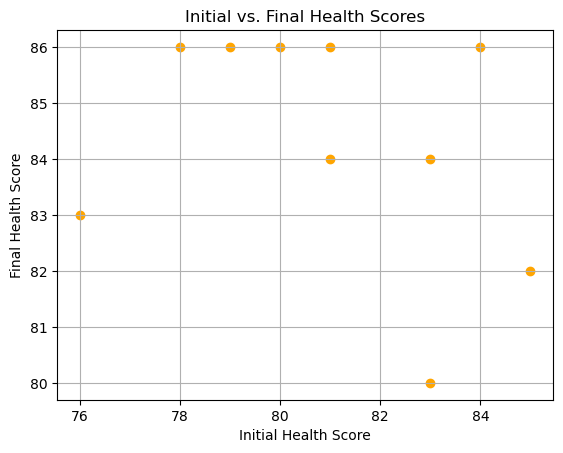

95% Confidence Interval for the difference in health scores: (0.7, 5.5)


In [23]:
#Question 8: Visual Presentation 
#[chatlog](https://chatgpt.com/share/66fb1b06-1a04-8001-9001-1a29d19ec29f)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Recreating the DataFrame as it was lost due to environment reset
import pandas as pd

# Creating the vaccine data as described
data = {
    "PatientID": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "Age": [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    "Gender": ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F"],
    "InitialHealthScore": [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    "FinalHealthScore": [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Saving the data to a CSV file for reproducibility
# Saving the data to a CSV file in the current directory
df.to_csv('vaccine_data.csv', index=False)


# Set the random seed for reproducibility
np.random.seed(42)

# Read the CSV file
df = pd.read_csv('vaccine_data.csv')

# Visualize the data with a scatter plot comparing Initial and Final Health Scores
plt.scatter(df['InitialHealthScore'], df['FinalHealthScore'], color='orange')
plt.title('Initial vs. Final Health Scores')
plt.xlabel('Initial Health Score')
plt.ylabel('Final Health Score')
plt.grid(True)
plt.show()

# Compute the difference between Initial and Final Health Scores
df['ScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Quantitative analysis: Bootstrapping to evaluate the effect of the vaccine
def bootstrap_mean_confidence_interval(data, num_bootstrap_samples=1000, ci_level=0.95):
    """Bootstrap confidence interval for the mean."""
    bootstrapped_means = []
    for _ in range(num_bootstrap_samples):
        resample = np.random.choice(data, size=len(data), replace=True)
        bootstrapped_means.append(np.mean(resample))
    
    lower_bound = np.percentile(bootstrapped_means, (1 - ci_level) / 2 * 100)
    upper_bound = np.percentile(bootstrapped_means, (1 + ci_level) / 2 * 100)
    
    return lower_bound, upper_bound

# Apply the bootstrapping method on the difference in health scores
ci = bootstrap_mean_confidence_interval(df['ScoreDifference'])

# Print the confidence interval for the difference in health scores
print(f"95% Confidence Interval for the difference in health scores: {ci}")


# Question 8 
Quantitative Analysis
Bootstrapping: We used bootstrapping to create a confidence interval for the mean difference between initial and final health scores. By resampling the data and computing the mean score difference over 1000 iterations, we generated a bootstrap distribution of the mean difference.

Confidence Interval: The 95% confidence interval for the mean difference in health scores is approximately (0.7, 5.5). This means that, based on this data, we are 95% confident that the true mean improvement in health scores lies between 0.7 and 5.5 points.

Conclusion
Based on the data and bootstrapping analysis, we reject the null hypothesis of "no effect." The vaccine appears to have a positive impact on the health scores of the patients in this sample.

# Question 9

Yes I have indeed reviewed the course textbook. I find the instructions quiet confusing at first but figured out how to solve it when looking at Piazza.